In [ ]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/siddhant-dutta/MOODIFY-learning/main/Assignment_3/problem2/train.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/siddhant-dutta/MOODIFY-learning/main/Assignment_3/problem2/test.csv')
data2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing for training
first store the training data without the labels in the shape - (no.of training examples, 28, 28) so that we can use this to visualize the image 

In [ ]:
x_train, y_train = data.iloc[:,1:].values.astype('float32'), data.iloc[:,0].values.astype('int32')
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_train.shape


(42000, 28, 28)

In [ ]:
x_test = data2.iloc[:,0:].values.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28)
x_test.shape

(28000, 28, 28)

In [ ]:
x_train[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188., 255.,
         94.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

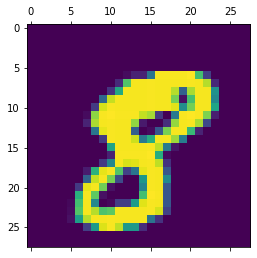

In [ ]:
plt.matshow(x_train[10])    # just visualization of the train data as an image

## Flattening the pixel activation data 
- This means storing it in the shape-(no. of examples, 28*28)
- Same is to be done with the test data

In [ ]:
x_train_ft = x_train.reshape(x_train.shape[0], 28*28)
x_test_ft = x_test.reshape(x_test.shape[0], 28*28)

In [ ]:
# Scalling down the pixel activations from 0-255 to the range 0-1 
# scalling down usually helps in 
x_train_ft /= 255
x_test_ft /= 255
x_test_ft[1].shape

(784,)

In [ ]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [ ]:
x_train_ft

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the model using tensorflow keras

In [ ]:
model = keras.Sequential([
        # Here we have made 2 hidden layers with 100 activations for each 
        keras.layers.Dense(100,input_shape=(784,), activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
        ])
model.compile(optimizer ="adam", loss='sparse_categorical_crossentropy',  # if the y_train was in the hot encoded form we would use loss='categorical_crossentropy'
                  metrics=['accuracy'])

In [ ]:
model.fit(x_train_ft, y_train, epochs =3)

Epoch 1/3
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5042 - accuracy: 0.8517
Epoch 2/3
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1217 - accuracy: 0.9624
Epoch 3/3
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0823 - accuracy: 0.9734


In [ ]:
# This function will give the predictions as a list 
def Prediction(x_test_ft):
  y_pred = model.predict(x_test_ft)
  y_pred_num = [np.argmax(i) for i in y_pred]
  return y_pred_num
Prediction(x_train_ft)[0:7]

[1, 0, 1, 4, 0, 0, 7]

In [ ]:
# Confusion matrix for the trained data and its predicted values
cm = tf.math.confusion_matrix(labels=y_train,predictions= Prediction(x_train_ft))
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[4094,    0,    0,    4,    2,   16,    3,    4,    5,    4],
       [   0, 4630,    9,   12,    5,    1,    2,   12,    6,    7],
       [   9,    4, 4111,   12,    0,    1,    2,   25,    6,    7],
       [   2,    3,    7, 4269,    0,   29,    0,   12,    9,   20],
       [   2,    4,    4,    2, 3989,    1,    5,   12,    1,   52],
       [   1,    1,    1,   13,    0, 3764,    4,    1,    4,    6],
       [   4,    4,    2,    0,    5,   32, 4088,    1,    1,    0],
       [   0,    6,    6,    1,    2,    2,    1, 4373,    2,    8],
       [   3,   10,    6,   32,    3,   26,    5,    9, 3942,   27],
       [   6,    0,    0,   21,   10,    9,    0,   61,    4, 4077]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

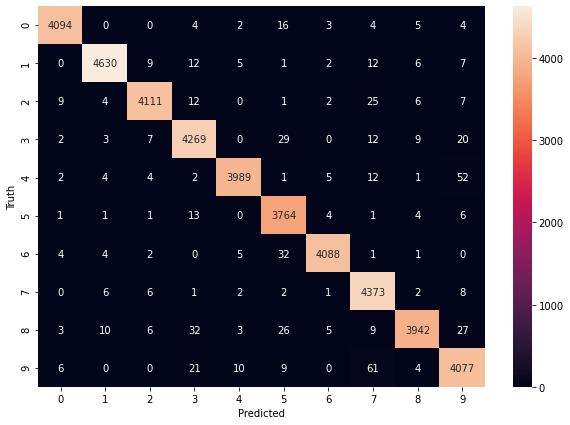

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Here we will just compare the predicted values of the test data with actual img of the test data 

In [ ]:
y_pred_labels = Prediction(x_test_ft)  


In [79]:
print('Enter the index range of the test examples ')
s,e = int(input('from: ')), int(input('to: ')) 
print('The classified digits according to the prediction by the model: ')
y_pred_labels[s:e]  

Enter the index range of the test examples 
from: 4
to: 6
The classified digits according to the prediction by the model: 


[3, 7]

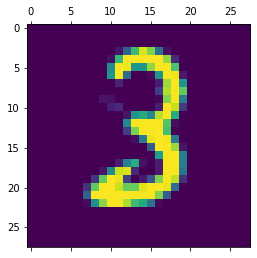

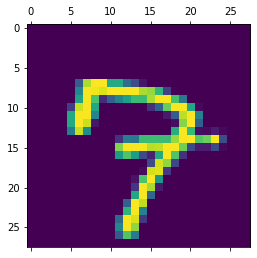

In [80]:
# just to compare the predicted values with the actual images of the test data
for i in range(s,e):
  plt.matshow(x_test[i])

## Storing the predicted values for the test data in csv format 

In [ ]:
index = [i for i in data2.index]

In [ ]:
y_pred_labels_d = pd.DataFrame(index)
y_pred_labels_d.columns = ['ImageID']
y_pred_labels = [i for i in y_pred_labels]
y_pred_labels_d['Label'] = y_pred_labels


In [ ]:
y_pred_labels_d.head()

,ImageID,Label
0,0,2
1,1,0
2,2,9
3,3,9
4,4,3


In [76]:
y_pred_labels_d.to_csv('/content/drive/MyDrive/MOODIFY /Introduction to machine learning/Assignment_3/Problem_2/Problem2.csv', index = False)